Lets consider a surface $x_3(x_1,x_2)$ which is a function of two other variables $x_1,x_2$. Our aim is to be able to regenerate the surface using GPR and analyse the corresponding error (uncertaininty function) and the  mean function.

For this let us consider an surface generaed by the equation 
$$ x_3 = sin(\frac{x_1}{2})*cos(\frac{x_2}{2})$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def mysurf(x1,x2):
    x3 = np.sin(x1/2)*np.cos(x2/2)
    return x3

x1 = np.linspace(-4,4,100)
x2 = np.linspace(-4,4,100)
x1forx3,x2forx3 = np.meshgrid(x1,x2)
x3 = mysurf(x1forx3,x2forx3)

Let us generate data for training whose range is smaller((-3,3), on both axes) than that of what we plotted ((-4,4), on both axes)

In [ ]:
nx1 = 10
nx2 = 10

x1Training = np.linspace(-3,3,nx1)
x2Training = np.linspace(-3,3,nx2)

x1Training,x2Training = np.meshgrid(x1Training,x2Training)
x3Training = mysurf(x1Training,x2Training)

x1Training = x1Training.flatten()
x2Training = x2Training.flatten()

xTraining = np.vstack((x1Training,x2Training))
xTraining = np.transpose(xTraining)
yTraining = x3Training.reshape(-1,1)

Scaling using a min max scaler.

In [24]:
# Let us scale the data before plotting as suggested by Nunzia
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xTraining)
xTraining = scaler.transform(xTraining)

In [16]:

# Let us scale the data before plotting as suggested by Nunzia
from sklearn.preprocessing import MinMaxScaler

x1 = x1.reshape((-1,1))
# reshaping has to be done because it is a requirement for the MinMaxScalre that the data has to be  2 dimensional array.
scaler = MinMaxScaler()
scaler.fit(x1)
x1 = scaler.transform(x1)

# similarly let us scale data in x2 direction
x2 = x2.reshape((-1,1))
scaler.fit(x2)
x2 = scaler.transform(x2)

Let us again restructure the data for plotting.

In [17]:
x1 =x1.squeeze()
x2 = x2.squeeze()
x1,x2 = np.meshgrid(x1,x2)

In [18]:
x1.shape

(100, 100)

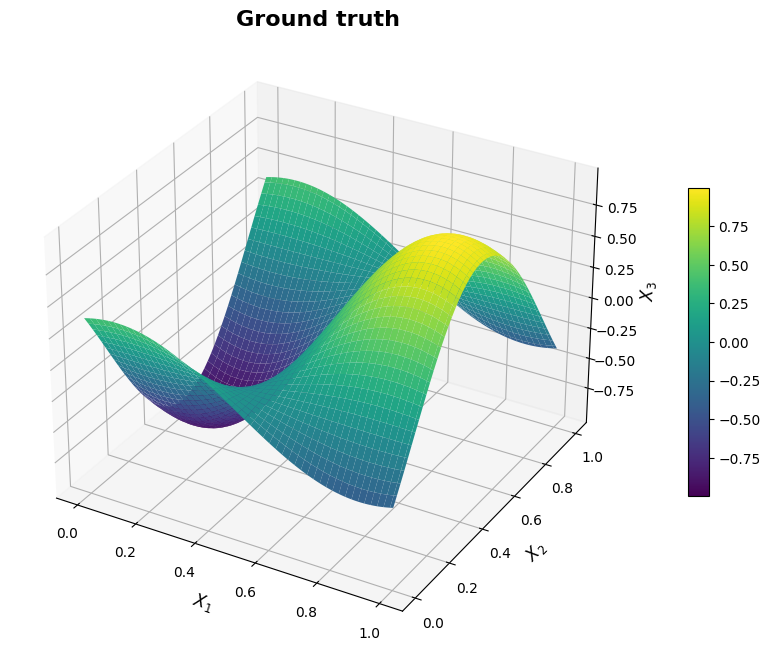

In [20]:
fig = plt.figure(figsize=(16,8))
axs= fig.add_subplot(111,projection='3d')
axs.set_title("Ground truth",fontweight="bold", fontsize=16)
axs.set_xlabel("$X_1$", fontweight="bold", fontsize=12)
axs.set_ylabel("$X_2$", fontweight= "bold", fontsize=12)
axs.set_zlabel("$X_3$", fontweight="bold",fontsize=12)

groundTruth = axs.plot_surface(x1,x2,x3,cmap="viridis")

fig.colorbar(groundTruth,aspect=15,shrink= 0.5)
#axs.view_init(elev=15, azim=30)

#### Collecting data points for GPR
We see the above figure representing how our surface looks like. We would like to reconstruct by performing GPR on some collected data points. 
- Let us choose nx1 = 10 datapoints in $x_1$ between [-3,3]
- Let us choose nx2 = 10 datapoints in $x_2$ between [-3,3] again.
- Using these datapoints we would like to reconstruct the GPR and check how the generated surface looks like.

Let us see how this data set looks like when plotted onto the gound truth.

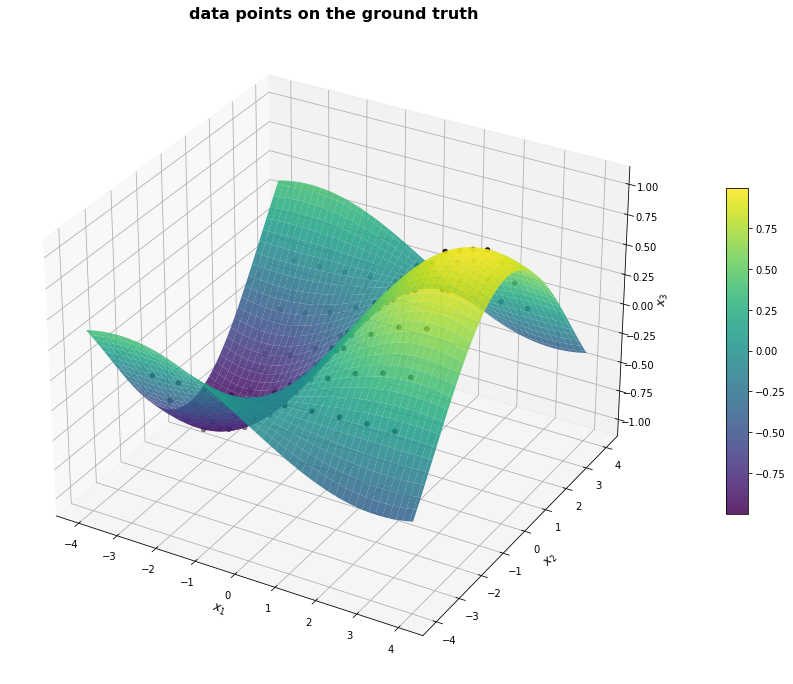

In [95]:
fig = plt.figure(figsize=(24,12))
axs=fig.add_subplot(111,projection="3d")

# adding labels and title
axs.set_title("data points on the ground truth", fontweight="bold", fontsize=16)
axs.set_xlabel("$x_1$", fontweight="bold", fontsize=12)
axs.set_ylabel("$x_2$", fontweight="bold", fontsize=12)
axs.set_zlabel("$x_3$", fontweight="bold", fontsize=12)

#plotting
groundTruth = axs.plot_surface(x1,x2,x3, cmap="viridis", alpha = 0.85)
axs.scatter(xTraining[:,0],xTraining[:,1],yTraining,c="k") 

fig.colorbar(groundTruth, shrink=0.5,  aspect=15)

#### Performing GPR

In [87]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
mykernel = 1*RBF(length_scale= np.array([1,1]), length_scale_bounds=[1e-3,1e3])
gpr_surf = GaussianProcessRegressor(mykernel, n_restarts_optimizer=9)
gpr_surf.fit(xTraining, yTraining)

/home/ponnana/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1]),
                         n_restarts_optimizer=9)

In [90]:
gpr_surf.kernel_

2.13**2 * RBF(length_scale=[4.91, 4.49])